In [1]:
import tensorflow
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import cv2
from tensorflow.keras import layers
import imutils

### Import the dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

### Convert our samples in float32

In [3]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

### Plot one sample

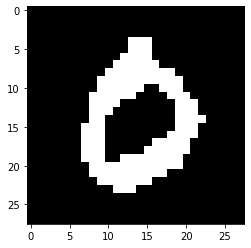

In [63]:
plt.imshow(x_test[3], cmap = 'gray')

### Build the model

In [87]:
model = keras.Sequential()

In [88]:
layer1 = layers.Conv2D(filters = 32, kernel_size = (5,5), activation ='relu', input_shape = (28,28,1))
layer2 = layers.MaxPooling2D(pool_size = (2,2))
layer3 = layers.Conv2D(filters = 16, kernel_size = (5,5), activation ='relu')
layer4 = layers.MaxPooling2D(pool_size = (2,2))
layer5 = layers.Flatten()
layer6 = layers.Dropout(0.5)
layer7 = layers.Dense(units = 10, activation = 'softmax')

In [89]:
list_layers = [layer1, layer2, layer3, layer4, layer5, layer6, layer7]

In [90]:
for layer in list_layers:
    model.add(layer)

In [91]:
model.layers

In [92]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 16)          12816     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [95]:
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics='accuracy')

### Reshape and scale our samples

In [ ]:
x_train = np.reshape(x_train (60000,28,28,1)) / 255
x_test = np.reshape(x_test,(10000,28,28,1)) / 255

### Train model

In [96]:
model.fit(x_train, y_train, epochs =30)

Epoch 1/30
1875/1875 [==============================] - 24s 12ms/step - loss: 1.4991 - accuracy: 0.5027
Epoch 2/30
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4508 - accuracy: 0.8603
Epoch 3/30
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3062 - accuracy: 0.9044
Epoch 4/30
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2540 - accuracy: 0.9206
Epoch 5/30
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2097 - accuracy: 0.9365
Epoch 6/30
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1866 - accuracy: 0.9434
Epoch 7/30
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1682 - accuracy: 0.9481
Epoch 8/30
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1537 - accuracy: 0.9531
Epoch 9/30
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1416 - accuracy: 0.9569
Epoch 10/30
1875/1875 [==============================] - 23s 12m

### Save model

In [97]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


### Load model

In [5]:
model = keras.models.load_model('my_model')

### Evaluate model

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0346 - accuracy: 0.9890


[0.03464227914810181, 0.9890000224113464]

### Divide each digits and build image for everyone

In [6]:
def separate_digits(image):
    _,img_thresholded = cv2.threshold(image,100,255,cv2.THRESH_BINARY_INV) # reverse black with white
    kernel = np.ones((3,3),'uint8')/3
    img_dilated = cv2.dilate(img_thresholded, kernel, iterations=2) # highlight the contour
    cnts = cv2.findContours(img_dilated.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) # find contours
    cnts = imutils.grab_contours(cnts)
    image_with_each_digit = []
    for c in cnts: # iterate every contour
        y, x, h, w = cv2.boundingRect(c) # find out the boundingbox coordinates
        each_digit = img_dilated[x-10:x+w+10,y-10:y+h+10] # extract each digit
        each_digit = cv2.resize(each_digit,(28,28)) # resize for input to model
        _, each_digit = cv2.threshold(each_digit,170,255,cv2.THRESH_BINARY) # all white pixels must have 255 px value
        image_with_each_digit.append(np.reshape(each_digit,(28,28,1)) / 255) #  reshape, scale and append to our digits list
    return np.array(image_with_each_digit) # our list contains each digit image
        
    

### Predicti label for each digit

In [8]:
def predict_label(images):
    labels =[]
    result = model.predict(images)
    for i in result:
        labels.append(np.argmax(i))
    full_image = cv2.hconcat(images)
    print(labels)
    plt.imshow(full_image, cmap = 'gray')    

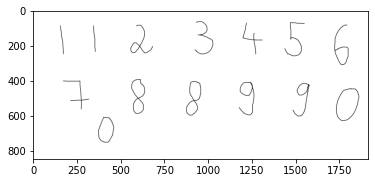

In [10]:
image = cv2.imread('alldigits2.png',0)
plt.imshow(image, cmap = 'gray')

[0, 0, 7, 7, 8, 2, 8, 1, 1, 2, 5, 4, 5, 3]


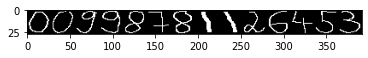

In [11]:
images = separate_digits(image)
predict_label(images)